In [219]:
%load_ext autoreload

%autoreload 2

In [2]:
% pwd

'C:\\Users\\Conor'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [9]:
file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(file_place + r"\Breast_data_raw")
Oesophageal_DF = pd.read_pickle(file_place + r"\Oesophageal_raw")
HN_DF = pd.read_pickle(file_place + r"\Tissue_raw")

# Raw data

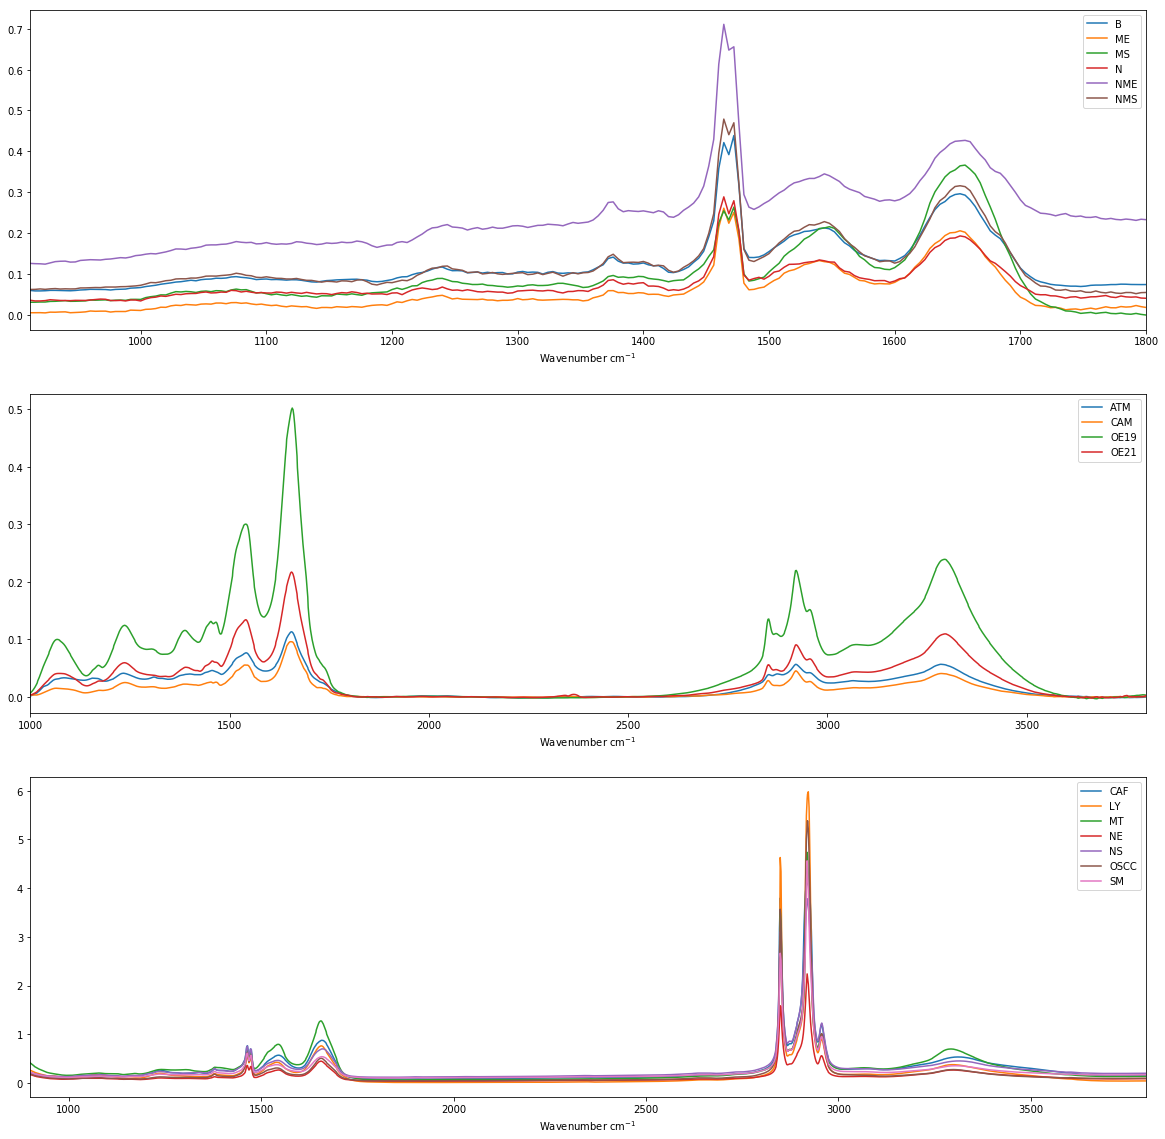

In [215]:
plt.clf()
fix, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20,20))

Titles = ["Breast", "HN", "Oesophageal"]
dfs = [Breast_DF, Oesophageal_DF, HN_DF]

for Title, df, ax in zip(Titles, dfs, axes.flat):
    for key, value in df.groupby("Label"):
        
        value.mean(axis = 0, numeric_only = True).plot(label = key, ax = ax)

        ax.set_title = Title
        ax.set_xlabel("Wavenumber cm$^{-1}$")
        ax.legend()
        
plt.show()

# Processed Data

Import tools for doing various analysis/ cleaning jobs

In [230]:
import Tissue_Analysis_Tools as TAT

C:\Users\Conor\Tissue_Analysis_Tools.py:254: DeprecationWarning: invalid escape sequence \{
  plt.savefig("{}\{}_ROC_Curve".format(save_place, title), pad_inches	 = 0)


Implement a preprocessing pipeline to try different methods

In [508]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler

steps = [
         ("Standard scaler", StandardScaler()),
         ("Robust scaler", RobustScaler()),
         #("Normalise", Normalizer(norm = "l1")),
         ("Minmax scaler", MinMaxScaler(feature_range = (0, 1)))
        ]

pipe  = Pipeline(steps)

In [509]:
processed_dfs = []

for df_name, dataframe in zip(["B_DF","O_DF","HN_DF"], [Breast_PCA, Oesophageal_DF, HN_DF]):
    
    dataframe = TAT.process_data(dataframe, balance = False)
    values = TAT.clean_spectra(dataframe.values, 1)
    values = pipe.fit_transform(values.T).T
    
    processed_dfs.append((df_name, pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)))
    
processed_dfs = dict(processed_dfs)

C:\Users\Conor\Tissue_Analysis_Tools.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe.drop(dataframe.iloc[:,paraffin_index[0]:paraffin_index[1]].columns, axis = 1, inplace = True)
C:\Users\Conor\Tissue_Analysis_Tools.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe.drop(dataframe.iloc[:,paraffin_index[0]:paraffin_index[1]].columns, axis = 1, inplace = True)
C:\Users\Conor\Tissue_Analysis_Tools.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe

In [497]:
Breast_PCA.reset_index()["Label"].value_counts()

NMS    2830
B      2665
NME    2567
MS     1574
ME     1332
N       186
Name: Label, dtype: int64

C:\Users\Conor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


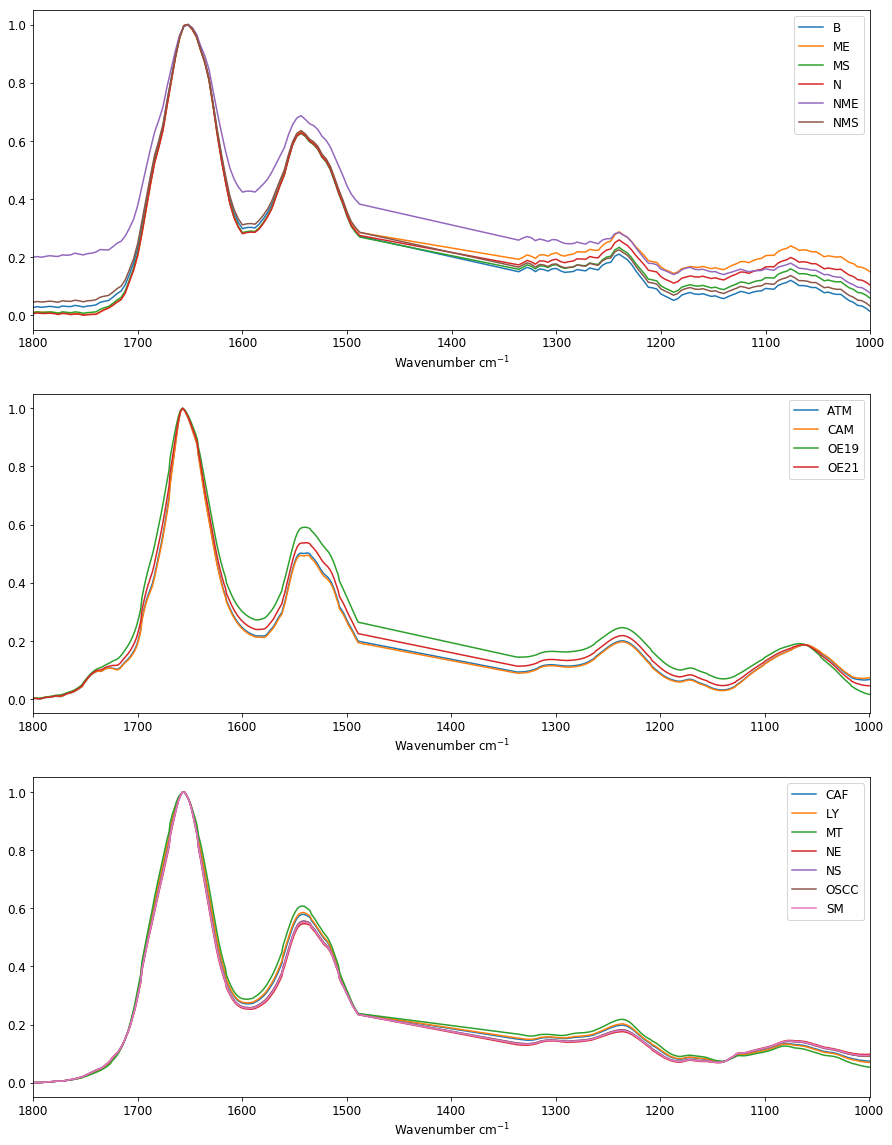

In [510]:
plt.clf()
fix, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,20))

Titles = ["Breast", "HN", "Oesophageal"]
dfs = [Breast_PCA, Oesophageal_DF, HN_DF]

#processed_dfs = [pipe.fit_transform(TAT.process_data(df, balance = False)) for df in dfs]

for Title, df, ax in zip(processed_dfs.keys(), processed_dfs.values(), axes.flat):
    for key, value in df.groupby("Label"):
        
        value.mean(axis = 0, numeric_only = True).plot(label = key, ax = ax)

        ax.set_title = Title
        ax.set_xlabel("Wavenumber cm$^{-1}$")
        ax.invert_xaxis()
        ax.legend()
        
plt.show()

In [519]:
Joined_Data = pd.concat(processed_dfs).interpolate(method = "linear", axis = 1, limit_direction = "both")

C:\Users\Conor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


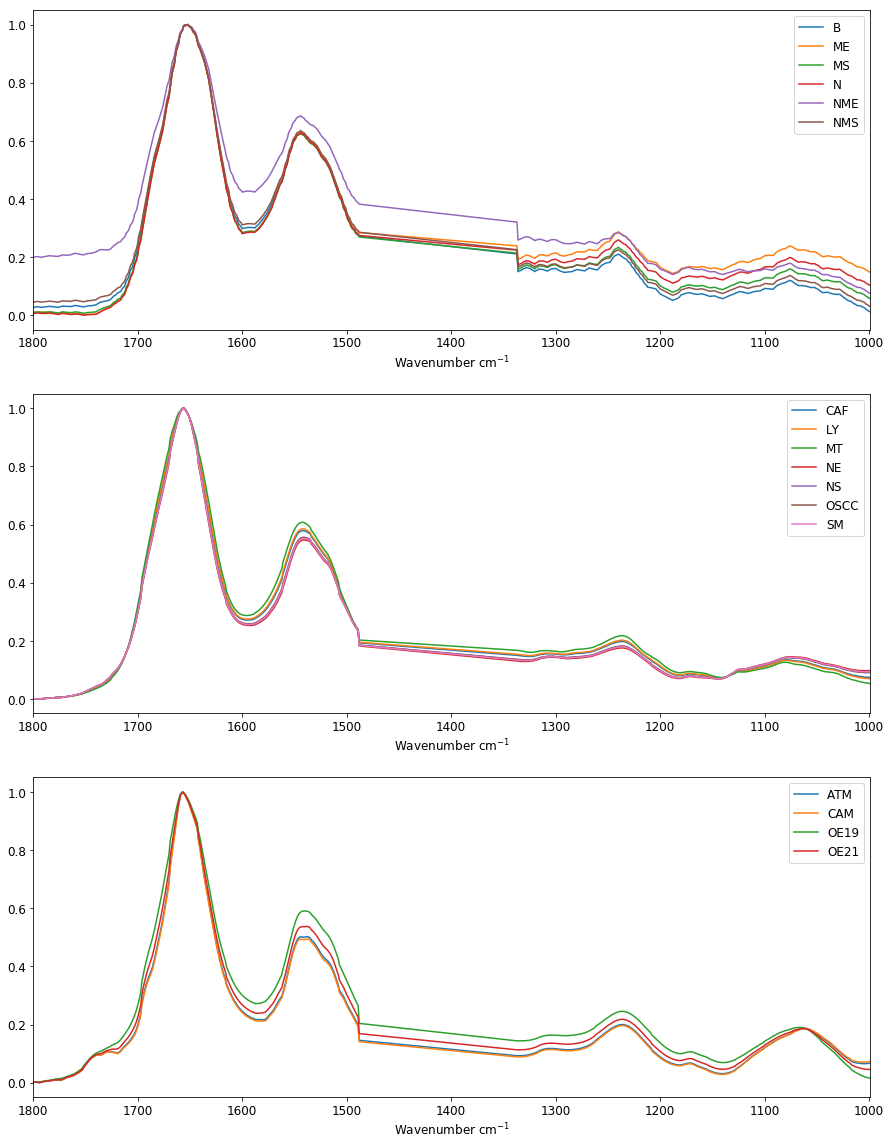

In [520]:
plt.clf()
fix, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,20))

Titles = ["Breast", "HN", "Oesophageal"]
dfs = list(zip(*Joined_Data.groupby(level = 0)))[1]

for Title, df, ax in zip(Titles, dfs, axes.flat):
    for key, value in df.groupby("Label"):
        
        value.mean(axis = 0, numeric_only = True).plot(label = key, ax = ax)

        ax.set_title = Title
        ax.set_xlabel("Wavenumber cm$^{-1}$")
        ax.invert_xaxis()
        ax.legend()
        
plt.show()

C:\Users\Conor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


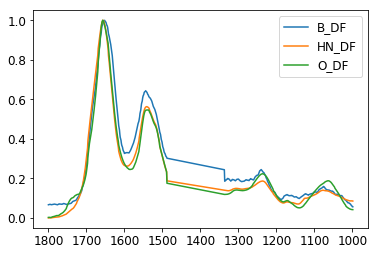

In [521]:
plt.clf()

for key,value in Joined_Data.groupby(level = 0):
    
    plt.plot(value.mean(axis = 0, numeric_only = True), label = key)

plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [477]:
Joined_Data.xs("HN_DF").values.shape

(177908, 419)

# Train and test the data

Using an default XGB classifier

In [479]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective = "multi:softprob", num_class = 2)

In [522]:
X_train, Y_train = Joined_Data.xs("B_DF").values, Joined_Data.xs("B_DF").reset_index()["New_label"]
X_test, Y_test = Joined_Data.xs("HN_DF").values, Joined_Data.xs("HN_DF").reset_index()["New_label"]

In [523]:
cv_results = pd.DataFrame(columns = ["n_estimators","max_depth","colsample_bytree","accuracy","AUC"])

Vary the hyperparameters of the classifier to find the best AUC, and accuracy etc..

In [ ]:
import random

from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import label_binarize

IDs = label_binarize(Y_test, classes = np.unique(Y_test))

for gamma in np.arange(0.2,1,0.1):
    for n_estimators in np.arange(100,1000,50):
        for max_depth in np.arange(10,60,5):
            for colsample_bytree in np.arange(0.4,1,0.2):

                # Train the xgboost classifier for each parameter
                xgb_cl = xgb.XGBClassifier(objective = "multi:softprob", 
                                           silent = True,
                                           n_estimators = n_estimators,
                                           seed = random.randint(0,100), 
                                           max_depth = max_depth, 
                                           num_boost_round = 10,
                                           early_stopping_rounds = 10,
                                           colsample_bytree = colsample_bytree,
                                           reg_lambda = 0.5,
                                           num_class= 2)

                xgb_cl.fit(X_train, Y_train)

                predictions = xgb_cl.predict(X_test)
                probabilities = xgb_cl.predict_proba(X_test)

                accuracy = accuracy_score(Y_test, predictions)
                AUC =  roc_auc_score(IDs, probabilities[:,1], average = "weighted")

                row = pd.DataFrame([gamma,n_estimators,max_depth,colsample_bytree,accuracy,AUC]
                                   ,index = ["gamma","n_estimators","max_depth","colsample_bytree","accuracy","AUC"]).T

                cv_results = cv_results.append(row)
                print(row)
                        
print("\nDone")

C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       10.0               0.4  0.598691  0.420784


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       10.0               0.6  0.598691  0.587005


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       10.0               0.8  0.598691  0.453347


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       15.0               0.4  0.598691  0.488978


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       15.0               0.6  0.598691  0.455582


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       15.0               0.8  0.598691  0.447297


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       20.0               0.4  0.598691  0.524085


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         100.0       20.0               0.6  0.583296  0.39161


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       20.0               0.8  0.581789  0.453661


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         100.0       25.0               0.4  0.598691  0.39641


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       25.0               0.6  0.555585  0.482379


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       25.0               0.8  0.598691  0.479728


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       30.0               0.4  0.598691  0.442918


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       30.0               0.6  0.598691  0.515416


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       30.0               0.8  0.598691  0.515182


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       35.0               0.4  0.598691  0.426023


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       35.0               0.6  0.591553  0.437896


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       35.0               0.8  0.598691  0.437602


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         100.0       40.0               0.4  0.598691  0.55486


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       40.0               0.6  0.598691  0.520956


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       40.0               0.8  0.598691  0.502036


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         100.0       45.0               0.4  0.598691  0.43326


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       45.0               0.6  0.598691  0.477841


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       45.0               0.8  0.598691  0.436164


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       50.0               0.4  0.598691  0.540514


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         100.0       50.0               0.6  0.598635  0.55012


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       50.0               0.8  0.598691  0.451139


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       55.0               0.4  0.598691  0.519424


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         100.0       55.0               0.6  0.598691  0.45934


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         100.0       55.0               0.8  0.598691  0.497561


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       10.0               0.4  0.598691  0.437604


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       10.0               0.6  0.598365  0.480143


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       10.0               0.8   0.63598  0.606652


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       15.0               0.4  0.598691  0.506148


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       15.0               0.6  0.598691  0.528754


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       15.0               0.8  0.598691  0.393804


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       20.0               0.4  0.594628  0.519664


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       20.0               0.6  0.597297  0.423581


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       20.0               0.8  0.518605  0.429877


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       25.0               0.4  0.598691  0.438563


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       25.0               0.6  0.598691  0.506769


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         150.0       25.0               0.8   0.54409  0.49151


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       30.0               0.4  0.598084  0.431819


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       30.0               0.6  0.598399  0.404364


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       30.0               0.8  0.598691  0.489981


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         150.0       35.0               0.4  0.598691  0.52528


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       35.0               0.6  0.598691  0.486628


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       35.0               0.8  0.599091  0.435112


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       40.0               0.4  0.598691  0.462507


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       40.0               0.6  0.598691  0.558684


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       40.0               0.8  0.582548  0.479154


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         150.0       45.0               0.4  0.598691  0.56199


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       45.0               0.6  0.598691  0.412896


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       45.0               0.8  0.598691  0.515552


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       50.0               0.4  0.598691  0.461287


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       50.0               0.6  0.598691  0.565661


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       50.0               0.8  0.598691  0.542902


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       55.0               0.4  0.598691  0.532004


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       55.0               0.6  0.598646  0.526843


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         150.0       55.0               0.8  0.574145  0.462398


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       10.0               0.4  0.449946  0.481128


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       10.0               0.6  0.598691  0.480139


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       10.0               0.8  0.598691  0.379957


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       15.0               0.4  0.599911  0.556688


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       15.0               0.6  0.595291  0.436254


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       15.0               0.8  0.598691  0.503527


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       20.0               0.4  0.598691  0.405969


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       20.0               0.6  0.567602  0.448813


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       20.0               0.8  0.563061  0.526379


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       25.0               0.4  0.598691  0.526962


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       25.0               0.6  0.598691  0.487963


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         200.0       25.0               0.8   0.58596  0.52182


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       30.0               0.4  0.598528  0.476322


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       30.0               0.6  0.587112  0.450985


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       30.0               0.8  0.598691  0.458809


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       35.0               0.4  0.598691  0.541381


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       35.0               0.6  0.598691  0.470615


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       35.0               0.8  0.598691  0.525087


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       40.0               0.4  0.598691  0.551319


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       40.0               0.6  0.597713  0.549981


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       40.0               0.8  0.598641  0.465675


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       45.0               0.4  0.597404  0.551998


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       45.0               0.6  0.598691  0.465123


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       45.0               0.8  0.554826  0.479952


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         200.0       50.0               0.4  0.598691  0.50911


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       50.0               0.6  0.598691  0.584038


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       50.0               0.8  0.598691  0.550343


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       55.0               0.4  0.598691  0.517623


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       55.0               0.6  0.597528  0.444668


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         200.0       55.0               0.8  0.598691  0.514906


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       10.0               0.4  0.598691  0.443199


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         250.0       10.0               0.6  0.598691  0.40672


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       10.0               0.8  0.581581  0.400266


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       15.0               0.4  0.598691  0.437545


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       15.0               0.6  0.598691  0.532257


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       15.0               0.8  0.538306  0.427186


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       20.0               0.4  0.598691  0.425375


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       20.0               0.6  0.585089  0.385956


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       20.0               0.8   0.55364  0.457613


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       25.0               0.4  0.598691  0.532247


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       25.0               0.6  0.598691  0.535791


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       25.0               0.8   0.59841  0.417431


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       30.0               0.4  0.598691  0.511118


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       30.0               0.6  0.598691  0.454174


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       30.0               0.8  0.598691  0.474525


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       35.0               0.4  0.598691  0.509945


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       35.0               0.6   0.54739  0.513442


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       35.0               0.8    0.5985  0.529345


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       40.0               0.4  0.598691  0.469382


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       40.0               0.6  0.585589  0.489795


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       40.0               0.8  0.598691  0.526268


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       45.0               0.4  0.598691  0.527999


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       45.0               0.6  0.598691  0.550438


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       45.0               0.8  0.598691  0.477915


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       50.0               0.4  0.598691  0.539352


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       50.0               0.6  0.598691  0.519572


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       50.0               0.8  0.598691  0.442185


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       55.0               0.4  0.598691  0.440362


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       55.0               0.6  0.598242  0.522686


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         250.0       55.0               0.8  0.598691  0.455182


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       10.0               0.4  0.597854  0.399517


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       10.0               0.6  0.598691  0.385115


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       10.0               0.8  0.595982  0.406143


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       15.0               0.4  0.598691  0.494832


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       15.0               0.6  0.596263  0.388281


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       15.0               0.8  0.598691  0.407112


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       20.0               0.4  0.597494  0.395328


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       20.0               0.6  0.538239  0.493388


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       20.0               0.8  0.597157  0.414603


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       25.0               0.4  0.598691  0.493241


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       25.0               0.6  0.595027  0.446591


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       25.0               0.8  0.593981  0.440934


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       30.0               0.4  0.598691  0.462102


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       30.0               0.6  0.598118  0.550186


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       30.0               0.8  0.587933  0.526698


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       35.0               0.4  0.598691  0.492388


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       35.0               0.6  0.559581  0.488249


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       35.0               0.8  0.598691  0.510653


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       40.0               0.4   0.58569  0.467242


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       40.0               0.6  0.598691  0.502018


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       40.0               0.8  0.598691  0.534811


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         300.0       45.0               0.4  0.598691  0.53599


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy     AUC
0    0.2         300.0       45.0               0.6  0.598691  0.5785


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       45.0               0.8  0.598691  0.457369


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       50.0               0.4  0.598691  0.464729


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       50.0               0.6  0.598691  0.525806


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       50.0               0.8  0.599664  0.493413


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       55.0               0.4  0.598691  0.477041


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         300.0       55.0               0.6  0.598691  0.565833


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         300.0       55.0               0.8  0.598691  0.54393


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       10.0               0.4  0.598691  0.439609


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       10.0               0.6  0.588636  0.384122


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       10.0               0.8  0.592216  0.464077


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       15.0               0.4  0.598691  0.457569


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       15.0               0.6  0.598691  0.554054


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       15.0               0.8  0.598691  0.473646


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       20.0               0.4  0.597764  0.444922


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       20.0               0.6  0.558362  0.497014


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       20.0               0.8  0.524445  0.457205


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       25.0               0.4  0.598691  0.417142


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       25.0               0.6  0.598691  0.519462


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       25.0               0.8  0.598691  0.506929


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         350.0       30.0               0.4  0.598691  0.57827


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       30.0               0.6  0.598691  0.563266


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       30.0               0.8  0.598691  0.504991


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       35.0               0.4  0.568204  0.518319


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       35.0               0.6  0.598691  0.513377


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       35.0               0.8  0.597786  0.475528


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       40.0               0.4  0.598691  0.483257


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       40.0               0.6  0.598641  0.492296


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       40.0               0.8  0.594667  0.522092


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       45.0               0.4  0.598691  0.565954


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       45.0               0.6  0.598051  0.448868


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       45.0               0.8  0.598691  0.484589


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       50.0               0.4  0.598691  0.529533


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       50.0               0.6  0.598691  0.555935


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       50.0               0.8  0.598641  0.508156


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       55.0               0.4  0.598691  0.575012


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       55.0               0.6  0.598691  0.540949


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         350.0       55.0               0.8   0.59746  0.501386


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       10.0               0.4   0.59872  0.557261


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       10.0               0.6  0.598691  0.526701


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       10.0               0.8  0.539655  0.364066


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       15.0               0.4  0.598691  0.545262


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       15.0               0.6  0.598691  0.480283


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       15.0               0.8  0.598691  0.492585


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       20.0               0.4  0.598691  0.474574


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       20.0               0.6  0.598691  0.482416


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       20.0               0.8  0.605504  0.577591


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       25.0               0.4  0.598517  0.489755


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       25.0               0.6  0.598691  0.446612


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       25.0               0.8  0.598691  0.509988


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       30.0               0.4  0.598691  0.415983


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       30.0               0.6  0.598691  0.449719


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       30.0               0.8  0.598691  0.451964


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       35.0               0.4  0.598691  0.443176


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       35.0               0.6  0.598691  0.563515


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       35.0               0.8    0.5985  0.433664


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       40.0               0.4  0.597747  0.499325


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       40.0               0.6  0.598214  0.527846


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       40.0               0.8  0.598691  0.515896


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       45.0               0.4  0.598691  0.513143


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       45.0               0.6  0.598691  0.521818


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       45.0               0.8  0.598691  0.524864


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       50.0               0.4  0.598691  0.461801


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       50.0               0.6   0.59786  0.458645


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         400.0       50.0               0.8  0.598691  0.50391


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       55.0               0.4  0.597809  0.503976


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       55.0               0.6  0.598691  0.524381


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         400.0       55.0               0.8  0.558986  0.463059


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       10.0               0.4  0.598691  0.486922


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       10.0               0.6  0.598691  0.448477


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       10.0               0.8  0.598691  0.479837


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       15.0               0.4  0.598691  0.609993


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       15.0               0.6  0.598691  0.510526


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       15.0               0.8  0.598691  0.587111


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       20.0               0.4  0.598691  0.485251


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       20.0               0.6  0.598691  0.510743


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       20.0               0.8  0.572785  0.413036


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       25.0               0.4  0.598691  0.561778


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       25.0               0.6  0.598691  0.481791


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       25.0               0.8  0.599091  0.458449


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       30.0               0.4  0.598691  0.457024


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       30.0               0.6  0.598691  0.478659


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       30.0               0.8  0.592261  0.469291


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       35.0               0.4  0.598691  0.488475


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       35.0               0.6  0.598461  0.520917


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       35.0               0.8  0.518043  0.495547


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       40.0               0.4  0.598691  0.460292


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       40.0               0.6  0.598691  0.407225


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       40.0               0.8  0.598691  0.463052


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       45.0               0.4  0.598691  0.541743


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       45.0               0.6  0.598691  0.473826


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       45.0               0.8  0.598759  0.602571


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       50.0               0.4  0.598691  0.543271


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       50.0               0.6  0.594779  0.534856


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       50.0               0.8  0.560419  0.494935


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       55.0               0.4  0.598141  0.450187


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       55.0               0.6  0.598579  0.516059


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         450.0       55.0               0.8  0.584757  0.529961


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       10.0               0.4  0.598691  0.451379


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       10.0               0.6  0.598506  0.405879


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         500.0       10.0               0.8  0.598691  0.48931


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy     AUC
0    0.2         500.0       15.0               0.4  0.598691  0.5268


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       15.0               0.6  0.598691  0.460884


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       15.0               0.8  0.598618  0.478154


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       20.0               0.4  0.588366  0.485546


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       20.0               0.6  0.598691  0.522606


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       20.0               0.8   0.57324  0.459012


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       25.0               0.4  0.598691  0.485199


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       25.0               0.6  0.598691  0.496269


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       25.0               0.8  0.570407  0.485673


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         500.0       30.0               0.4  0.598691  0.55216


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       30.0               0.6  0.598691  0.484399


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       30.0               0.8  0.590339  0.491448


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       35.0               0.4  0.598691  0.508965


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       35.0               0.6   0.59863  0.460301


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       35.0               0.8  0.598691  0.527271


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         500.0       40.0               0.4  0.598691  0.50322


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         500.0       40.0               0.6  0.598691  0.49046


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       40.0               0.8  0.585679  0.458553


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       45.0               0.4  0.598433  0.457006


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         500.0       45.0               0.6  0.519578  0.50221


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       45.0               0.8  0.598691  0.450043


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       50.0               0.4  0.597719  0.531457


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       50.0               0.6  0.598691  0.564625


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       50.0               0.8  0.598691  0.570948


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       55.0               0.4  0.598691  0.510837


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         500.0       55.0               0.6  0.598691  0.52571


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         500.0       55.0               0.8  0.598691  0.445071


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         550.0       10.0               0.4  0.598613  0.38514


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       10.0               0.6  0.597657  0.365692


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       10.0               0.8  0.598691  0.483471


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       15.0               0.4  0.606004  0.600315


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       15.0               0.6  0.598691  0.458135


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         550.0       15.0               0.8  0.598691  0.71525


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       20.0               0.4    0.5913  0.574111


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       20.0               0.6  0.598691  0.497867


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       20.0               0.8  0.596168  0.424092


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       25.0               0.4  0.598691  0.468114


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       25.0               0.6  0.597449  0.577361


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       25.0               0.8  0.598691  0.459111


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       30.0               0.4  0.598691  0.403429


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       30.0               0.6  0.598691  0.454566


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       30.0               0.8  0.575944  0.472393


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       35.0               0.4  0.598506  0.424096


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       35.0               0.6  0.598691  0.519372


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       35.0               0.8  0.598691  0.378745


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       40.0               0.4  0.598691  0.495422


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       40.0               0.6  0.598691  0.494941


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       40.0               0.8  0.598691  0.399707


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       45.0               0.4  0.598691  0.462216


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       45.0               0.6  0.598691  0.443805


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       45.0               0.8  0.599433  0.441326


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       50.0               0.4  0.598691  0.514814


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       50.0               0.6  0.598023  0.494765


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       50.0               0.8  0.570188  0.434899


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       55.0               0.4  0.598691  0.492881


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       55.0               0.6  0.591255  0.494272


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         550.0       55.0               0.8  0.598691  0.613844


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       10.0               0.4  0.598691  0.512762


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       10.0               0.6  0.598691  0.533777


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       10.0               0.8  0.598691  0.357118


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         600.0       15.0               0.4  0.602514  0.48406


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       15.0               0.6  0.630832  0.695492


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         600.0       15.0               0.8  0.598691  0.42903


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       20.0               0.4  0.598691  0.549863


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       20.0               0.6  0.598691  0.451245


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       20.0               0.8  0.598691  0.483132


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       25.0               0.4  0.598691  0.488079


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       25.0               0.6  0.598354  0.501902


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       25.0               0.8  0.598191  0.473169


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       30.0               0.4  0.598691  0.490403


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       30.0               0.6  0.598691  0.449012


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       30.0               0.8  0.541701  0.439251


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       35.0               0.4  0.554731  0.500235


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       35.0               0.6  0.525052  0.488093


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       35.0               0.8  0.598691  0.489205


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       40.0               0.4  0.598691  0.502248


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy     AUC
0    0.2         600.0       40.0               0.6  0.598691  0.4821


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       40.0               0.8  0.581874  0.517462


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         600.0       45.0               0.4  0.598691  0.44955


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       45.0               0.6  0.598691  0.481724


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       45.0               0.8  0.598691  0.474149


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       50.0               0.4  0.598691  0.494401


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       50.0               0.6  0.598607  0.435887


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       50.0               0.8  0.551032  0.440827


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       55.0               0.4  0.595594  0.486451


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         600.0       55.0               0.6  0.598062  0.55986


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         600.0       55.0               0.8  0.598691  0.597459


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       10.0               0.4  0.598691  0.564001


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       10.0               0.6  0.598101  0.412771


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       10.0               0.8  0.598691  0.445793


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       15.0               0.4  0.580632  0.567638


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       15.0               0.6  0.598691  0.590522


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       15.0               0.8  0.598691  0.632582


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       20.0               0.4  0.598691  0.632011


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         650.0       20.0               0.6  0.598691  0.51963


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         650.0       20.0               0.8  0.554483  0.48672


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       25.0               0.4  0.597387  0.472051


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       25.0               0.6  0.598691  0.495184


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       25.0               0.8  0.598585  0.439429


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       30.0               0.4  0.598691  0.442108


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       30.0               0.6  0.598686  0.475427


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         650.0       30.0               0.8  0.598691  0.51154


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       35.0               0.4  0.598691  0.486607


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       35.0               0.6  0.598287  0.525044


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       35.0               0.8  0.598691  0.430545


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       40.0               0.4  0.598691  0.572914


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       40.0               0.6  0.598691  0.504453


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       40.0               0.8  0.598691  0.442489


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       45.0               0.4  0.598691  0.500097


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         650.0       45.0               0.6  0.598691  0.43712


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       45.0               0.8  0.536092  0.438077


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       50.0               0.4  0.598691  0.504831


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       50.0               0.6  0.598152  0.562584


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       50.0               0.8  0.598691  0.518164


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       55.0               0.4  0.598691  0.503804


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       55.0               0.6  0.596005  0.490156


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         650.0       55.0               0.8  0.586826  0.518776


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       10.0               0.4  0.598691  0.534966


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       10.0               0.6  0.586297  0.488958


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       10.0               0.8  0.598691  0.407348


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       15.0               0.4  0.598691  0.617804


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       15.0               0.6  0.598691  0.512542


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       15.0               0.8  0.598691  0.574424


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       20.0               0.4  0.602407  0.518105


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       20.0               0.6  0.598691  0.467665


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       20.0               0.8  0.599248  0.572969


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       25.0               0.4  0.598691  0.440962


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       25.0               0.6  0.598691  0.450355


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       25.0               0.8  0.598691  0.428609


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       30.0               0.4  0.598691  0.441749


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       30.0               0.6  0.598691  0.521691


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       30.0               0.8  0.545405  0.501654


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       35.0               0.4  0.598691  0.505662


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       35.0               0.6  0.567664  0.452843


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       35.0               0.8  0.598691  0.418077


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       40.0               0.4  0.598691  0.548206


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       40.0               0.6  0.599473  0.476624


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       40.0               0.8   0.44853  0.420608


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       45.0               0.4  0.594521  0.508034


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       45.0               0.6  0.598691  0.476249


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       45.0               0.8  0.596426  0.450208


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       50.0               0.4  0.598691  0.552054


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       50.0               0.6   0.59764  0.444818


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       50.0               0.8  0.598691  0.521064


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       55.0               0.4  0.597764  0.543175


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       55.0               0.6  0.536536  0.505461


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         700.0       55.0               0.8  0.598691  0.385005


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       10.0               0.4  0.598691  0.534579


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       10.0               0.6  0.598691  0.442251


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy     AUC
0    0.2         750.0       10.0               0.8  0.598691  0.4842


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       15.0               0.4  0.642754  0.677707


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       15.0               0.6  0.658284  0.669999


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       15.0               0.8  0.598691  0.598801


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       20.0               0.4  0.598691  0.491895


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         750.0       20.0               0.6  0.598691  0.44347


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       20.0               0.8  0.417637  0.446827


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       25.0               0.4  0.598691  0.408996


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       25.0               0.6  0.597011  0.484255


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         750.0       25.0               0.8  0.598602  0.48225


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       30.0               0.4  0.598691  0.518694


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       30.0               0.6  0.598691  0.464435


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       30.0               0.8  0.582014  0.473653


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       35.0               0.4  0.598691  0.467155


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       35.0               0.6  0.598691  0.438451


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy     AUC
0    0.2         750.0       35.0               0.8  0.598613  0.3801


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         750.0       40.0               0.4  0.598691  0.54396


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       40.0               0.6  0.584606  0.485163


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy      AUC
0    0.2         750.0       40.0               0.8  0.598691  0.46279


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       45.0               0.4  0.596971  0.506255


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       45.0               0.6  0.564084  0.483799


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


   gamma  n_estimators  max_depth  colsample_bytree  accuracy       AUC
0    0.2         750.0       45.0               0.8  0.598691  0.459507


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


In [ ]:
cv_results

In [193]:
from sklearn.decomposition import PCA

def clean_spectra(input_spectra, n_components):
    
    pca_values = PCA(n_components = n_components).fit(input_spectra)
    
    filtered = np.dot(pca.transform(input_spectra)[:,:n_components], pca.components_[:n_components,:])
    filtered += np.mean(input_spectra, axis = 0)
    
    return filtered